In [1]:
# Import needed stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Get the merged data we created in our data analysis
merged_census_MDE_df = pd.read_csv("Merged_MDE_Census_data.csv")

# Get the US data
Info_df = pd.read_csv("Info.csv")
Info_df = Info_df.set_index('Category')
Info_df.head()

,US,MN
Category,,
% of Special Ed Students,52.4,34.30
% of Students of Color,15.2,16.18
% of ELL Students,10.1,8.36
% of residents experiencing poverty,12.7,9.90


In [3]:
# Function to create Linear Regression plots
x_values = []
y_values = []

def linearregression(x_values): 
    x_axis = x_values
    y_axis = y_values 
    
    correlation = st.pearsonr(y_axis, x_axis)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=y_axis, alpha=0.75)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(1,30),fontsize=18,color="red")
    
    correlation_matrix = np.corrcoef(x_axis, y_axis)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2

    print(f"The r-squared is: {round(r_squared,5)}")
    print(f"The correlation is: {round(correlation[0],2)}")

The r-squared is: 0.16198
The correlation is: 0.4


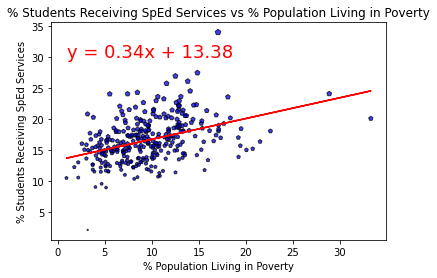

In [4]:
# Linear Regression of Poverty
y_values = merged_census_MDE_df['Percent of Students Receiving Special Education Services']
x_values = merged_census_MDE_df['Percent in Poverty']

linearregression(x_values)

plt.title("% Students Receiving SpEd Services vs % Population Living in Poverty")
plt.ylabel("% Students Receiving SpEd Services")
plt.xlabel("% Population Living in Poverty")
plt.show()

The r-squared is: 0.00331
The correlation is: -0.06


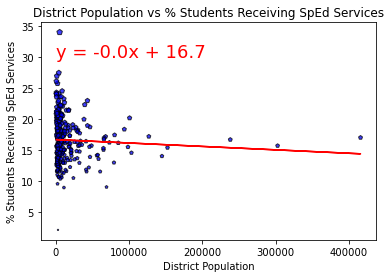

In [5]:
# Linear Regression of Population
y_values = merged_census_MDE_df['Percent of Students Receiving Special Education Services']
x_values = merged_census_MDE_df['Population']

linearregression(x_values)

plt.title("District Population vs % Students Receiving SpEd Services")
plt.ylabel("% Students Receiving SpEd Services")
plt.xlabel("District Population")
plt.show()

The r-squared is: 0.01633
The correlation is: 0.13


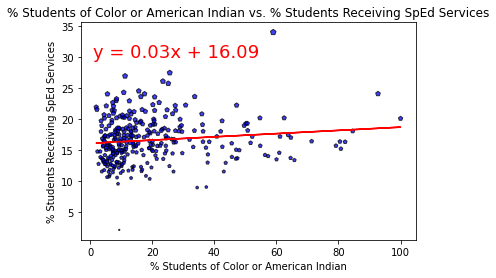

In [6]:
# Linear Regression of Students of Color
y_values = merged_census_MDE_df['Percent of Students Receiving Special Education Services']
x_values = merged_census_MDE_df['Percent of Students of Color or American Indian']

linearregression(x_values)

plt.title("% Students of Color or American Indian vs. % Students Receiving SpEd Services")
plt.ylabel("% Students Receiving SpEd Services")
plt.xlabel("% Students of Color or American Indian")
plt.show()

The r-squared is: 0.00538
The correlation is: -0.07


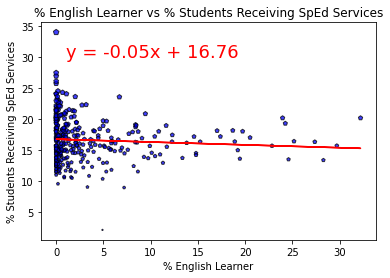

In [7]:
# Linear Regression of English Learner
y_values = merged_census_MDE_df['Percent of Students Receiving Special Education Services']
x_values = merged_census_MDE_df['Percent English Learner']

linearregression(x_values)

plt.title("% English Learner vs % Students Receiving SpEd Services")
plt.ylabel("% Students Receiving SpEd Services")
plt.xlabel("% English Learner")
plt.show()

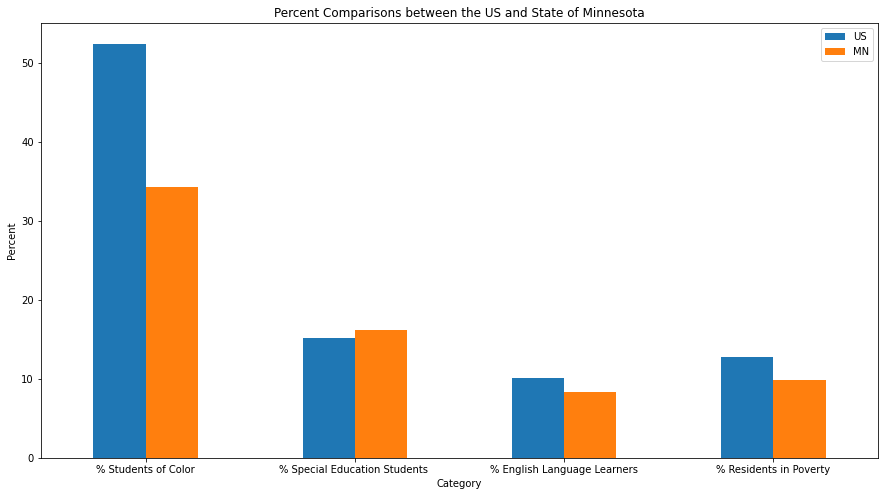

In [16]:
# Create the bar chart of US and MN data
Info_df.plot(kind="bar", figsize=(15,8))
plt.title("Percent Comparisons between the US and State of Minnesota")
plt.xticks([0,1,2,3],["% Students of Color", "% Special Education Students ", "% English Language Learners", "% Residents in Poverty"], rotation="horizontal")
plt.xticks(rotation="horizontal")
plt.ylabel('Percent')
plt.show()

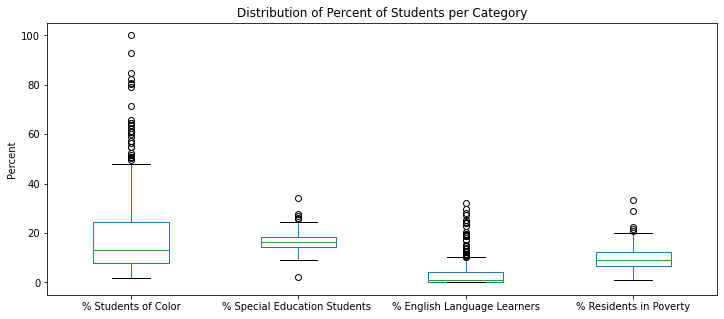

In [9]:
# Creat the boxplot
merged_census_MDE_df.boxplot(column = ["Percent of Students of Color or American Indian","Percent of Students Receiving Special Education Services","Percent English Learner","Percent in Poverty"], figsize=(12,5), grid=False)
plt.xticks([1,2,3,4],["% Students of Color", "% Special Education Students ", "% English Language Learners", "% Residents in Poverty"], ha='center')
plt.title("Distribution of Percent of Students per Category")
plt.ylabel('Percent')
plt.show()